

# Project: Investigating Movie Trends and Ratings from the TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analyzing a dataset given from The Movie Database (TMDB). In this dataset, there are around 10,000 movies with their respective titles, cast, director, ratings ..etc. I chose to analyze this dataset because I have had several questions pertaining to movies that I have always had. Hopefully, by doing this correctly, I can finally have these questions answered. 

First question that I want to explore is whether a movie runtime actually affects it's success, because if a movie is too short , it can be too brief and confusing, while if a movie is too long, it can hinder it's artistic expression and just bore the audience. As a bonus, I also want to see whether short films or longer feature films make more money.

For my second question, I was wondering if the release month for movies matter. Are higher rated movies released in particular months, how about the popular big name titles? If so, why those months? I have a hunch about the answer to this question, but it is always great to make sure.

Lastly, one question that I have always wondered, since everyone has different taste, what genre is the most popular?! Is that genre also the most highly rated?? I need to know the answer, so lets find out!


In [1]:
# import modules and packages for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Look at the first 2 rows to see how the data are placed in the table.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Checking to see if there are any null values in each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The vote average for all the movies in the dataset is a little skewed to the left and the release year is skewed heavily to the left, which makes sense, as more movies are being increasingly produced.

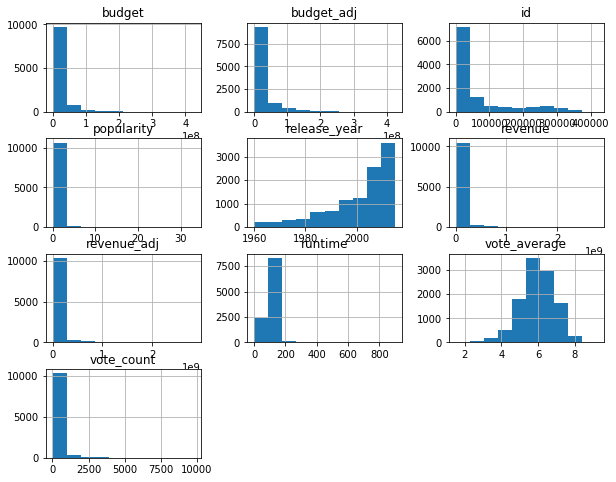

In [4]:
# Basic histogram analysis of the different parameters for a big picture understanding
df.hist(figsize=(10,8));


### Data Cleaning: Taking Out Irrelevant Columns and Checking for Duplicates 

For our analyses, we do not need the columns, id, imdb_id, cast, homepage, director, tagline, keywords, 
overview, production_companies, release year, and budget and revenue have adjusted columns so these are redundant.

In [5]:
# Dropping extra columns and checking 
df.drop(['id','imdb_id','budget','revenue','cast','homepage','director','tagline','keywords','overview','production_companies','release_year'],axis=1, inplace=True)


In [6]:
df.shape

(10866, 9)

In [7]:
df.info()
#The genres column do have some null values, but that column is not essential for my analysis until the last question,
#i will address it then so i get more data for the other questions.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 764.1+ KB


In [8]:
#Drop duplicates and check
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis


### Does a movie runtime affect a movies rating, if so, what is the best runtime for a movie to achieve the best ratings?

My thought process here is to separate the runtime into different tier lists and then compare them to variables that have some metric of success, such as popularity, voted ratings, and adjusted profits, a column that I want to calculate later. 

For the next few lines of code, I will set the different categories of runtime with bins and then graph them against the means of votes, popularity and profitability. I am doing this so that we can easily see any relationships that exists between these variables. A bar graph can really show the differences between the dependent variables. 

In [9]:
# Want to set the different tiers with a distribution
df['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

The runtime categories will be set as such:  
Short : 0 - 90 minutes  
Medium: 91-99 minutes  
Moderately Long: 100-111 minutes  
Long: 111 + minutes  


In [10]:
# Setting the bins
bin_edges = [0.00 ,90.00 ,99.00 ,111.00 ,900.000]

In [11]:
bin_names = ['Short','Medium','Moderately Long','Long' ]

In [12]:
df['runtime_levels'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)

In [13]:
# Check
df.head(3)

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,runtime_levels
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09,Long
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1.379999e+08,3.481613e+08,Long
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1.012000e+08,2.716190e+08,Long


In [14]:
# Grouping the means of the votes by runtime
df.groupby('runtime_levels')['vote_average'].mean()

runtime_levels
Short              5.759877
Medium             5.729687
Moderately Long    6.034618
Long               6.397085
Name: vote_average, dtype: float64

In [15]:
vote_mean = df.groupby('runtime_levels')['vote_average'].mean()

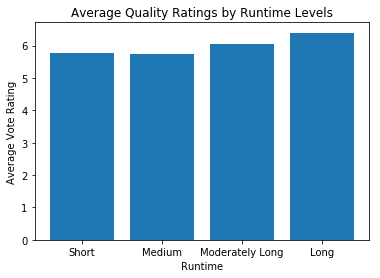

In [16]:
# Graph of Runtime levels vs. vote average 
locations = [1, 2, 3, 4]
heights = [vote_mean[0], vote_mean[1], vote_mean[2], vote_mean[3]]
labels = ['Short', 'Medium','Moderately Long','Long']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Runtime Levels')
plt.xlabel('Runtime')
plt.ylabel('Average Vote Rating');

In [17]:
pm = df.groupby('runtime_levels')['popularity'].mean()

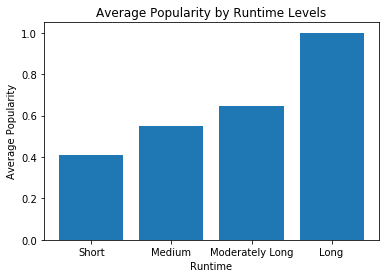

In [18]:
# Graph of Runtime vs Popularity
locations = [1, 2, 3, 4]
heights = [pm[0], pm[1], pm[2], pm[3]]
labels = ['Short', 'Medium','Moderately Long','Long']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity by Runtime Levels')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity');

## Observations 
It seems that movies that are in the long categories are more popular and achieve higher voted ratings and shorter movies have lower popularity and ratings. 

I want to check for profit for these movies by subtracting the adjusted revenue by the adjusted budget, but there are many columns with 0 budgets or 0 revenue, so I am going to make a separate dataframe with inputted budgets and revenue. 

In [19]:
# Making a separate dataframe without adjusted budget and revenues that equal 0. 
dfp = df.query('budget_adj != 0.0')

In [20]:
dfp = dfp.query('revenue_adj != 0.0')

In [21]:
dfp.head(1)

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,runtime_levels
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09,Long


In [22]:
dfp.shape

(3854, 10)

In [23]:
# Making a profit column by subtracting adjusted budget from revenue and checking
dfp['profit_adj'] = dfp['revenue_adj']-dfp['budget_adj']

In [24]:
dfp.head(1)

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,runtime_levels,profit_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09,Long,1.254446e+09


In [25]:
profit = dfp.groupby('runtime_levels')['profit_adj'].mean()

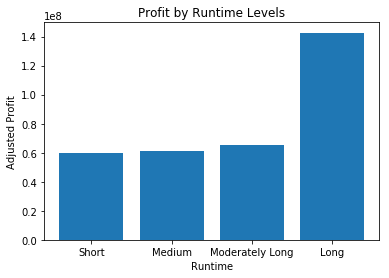

In [26]:
# Graphing the profit vs the runtime levels i previously set
locations = [1, 2, 3, 4]
heights = [profit[0], profit[1], profit[2], profit[3]]
labels = ['Short', 'Medium','Moderately Long','Long']
plt.bar(locations, heights, tick_label=labels)
plt.title('Profit by Runtime Levels')
plt.xlabel('Runtime')
plt.ylabel('Adjusted Profit');

The long movies seem to make the most profit for the studios as well, which is a big incentive for them to keep making movies of this length. 

So far, all three metrics of success has shown that movies that run for a longer amount of time has higher popularity, ratings, and profits. 

A thing to consider is that perhaps our runtime parameters should be adjusted to the parameters set by the Academy of Motion Picture Arts and Sciences. According to the Academy, feature length films are all films that are longer than 40 minutes while short films are the films that run for less. 

Link : https://www.oscars.org/

For the next few lines of code, I will partition these runtime lengths into new categories that align with the new definition i stated above and rerun the bar graphs with these new parameters to see if there are any differences.

In [27]:
# Resetting some bins to match my parameters
binedge = [0,40,900]

In [28]:
binname = ['Short', 'Feature Length']

In [29]:
df['academy_length'] = pd.cut(df['runtime'], binedge, labels=binname)

In [30]:
dfp['academy_length'] = pd.cut(dfp['runtime'], binedge, labels=binname)

In [31]:
vm = df.groupby('academy_length')['vote_average'].mean()
pm = df.groupby('academy_length')['popularity'].mean()
p = dfp.groupby('academy_length')['profit_adj'].mean()

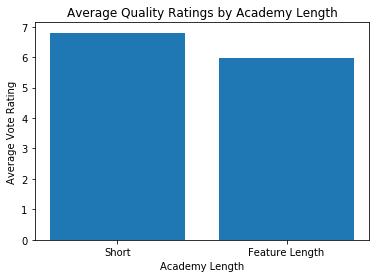

In [32]:
# Graph of the new Feature length categories vs the avg rating and then popularity and profit
locations = [1, 2]
heights = [vm[0], vm[1]]
labels = ['Short','Feature Length']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Academy Length')
plt.xlabel('Academy Length')
plt.ylabel('Average Vote Rating');

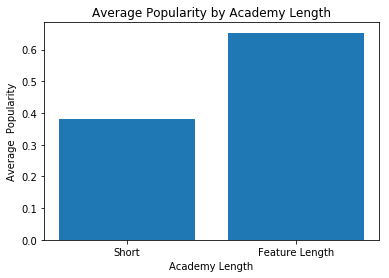

In [33]:
locations = [1, 2]
heights = [pm[0], pm[1]]
labels = ['Short','Feature Length']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity by Academy Length')
plt.xlabel('Academy Length')
plt.ylabel('Average  Popularity');

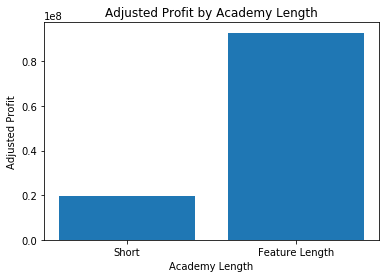

In [34]:
locations = [1, 2]
heights = [p[0], p[1]]
labels = ['Short','Feature Length']
plt.bar(locations, heights, tick_label=labels)
plt.title('Adjusted Profit by Academy Length')
plt.xlabel('Academy Length')
plt.ylabel('Adjusted Profit');

## Observations and Conclusions

What a difference! It seems like short films are rated higher compared to their feature length counterparts. However, the popularity and profits are heavily skewed towards feature length movies. From a studio standpoint, to make the most money, they would continue to make more feature length movies. For consumers, popular titles/stories/franchises are probably in the feature length format, however, short films seem to garner a higher voted rating. Short films are fresh and straight to the point, which could be why they have higher ratings, but to test the other reasons such as studio participation, artistic direction...etc , more data should be analyzed for short films!

Doing this analysis and seeing different results depending on what I combined and called different lengths of a movies seems to be an example of the Simpson's Paradox. 

### What Movie Release Months have the Highest Rated Movies, Most Popular Movies, and make the Most Money?
My thought process here is to convert the release dates into datetime so that I can extract the months and make graphs from there, relating in the self-designated metrics of success (voted ratings, profits, and movie popularity). 

I am doing a line graph to graph these extrapolated months and using the same dependent variables, rating, popularity, and profits, to see the change over time. This can also let us see which months are the best/worst. I feel that line graphs are the best for this task.

In [35]:
# Extract months from the release date column and make a new month column from both profit dataframe and original
df['release_date'] = pd.to_datetime(df['release_date'])
dfp['release_date'] = pd.to_datetime(dfp['release_date'])

In [36]:
df['release_month'] = df['release_date'].dt.month
dfp['release_month'] = dfp['release_date'].dt.month

In [37]:
df.head(1)

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,runtime_levels,academy_length,release_month
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,Long,Feature Length,6


In [38]:
dfp.head(1)

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,runtime_levels,profit_adj,academy_length,release_month
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,Long,1.254446e+09,Feature Length,6


In [39]:
vote=df.groupby('release_month')['vote_average'].mean()

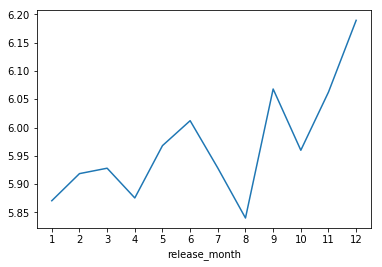

In [40]:
# Plot line graphs showing change over time of vote averages, popularity , and lastly profit
vote.plot();
plt.xticks(np.arange(min(df['release_month']), max(df['release_month'])+1, 1.0));

In [41]:
pop = df.groupby('release_month')['popularity'].mean()

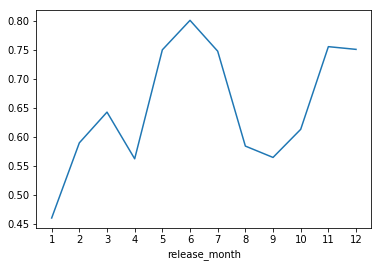

In [42]:
pop.plot()
plt.xticks(np.arange(min(df['release_month']), max(df['release_month'])+1, 1.0));

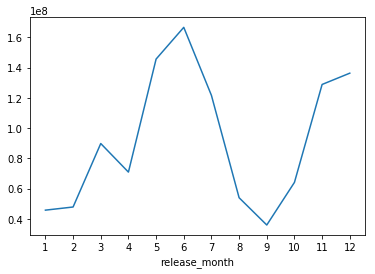

In [43]:
prof = dfp.groupby('release_month')['profit_adj'].mean()
prof.plot()
plt.xticks(np.arange(min(dfp['release_month']), max(dfp['release_month'])+1, 1.0));

## Observations 

It seems that the more highly rated movies are released towards the end of the year, as there are two peaks in September as well as December. The month of June is very interesting as that month has the highest number of popular movies as well as yield the biggest profits, but the ratings are not that high. However, the holiday season (November and December) are not far behind in popular movie releases as well as profits. One major difference between these two times in the year is that movies released during November and December are better rated. I guess the best time to watch and make movies are for the end of the year!

### Which Genres are the Most Popular, and Highest Voted?
Since there are multiple genres per movie for most movies, I am going to split up the genres in each movie into separate genre columns on the same row. Doing this will allow me to group multiple genre movies into ratings and popularities means that match all their ratings. I will also set a bar graph with all the genres listed on the bottom and shows their respective ratings and popularities. 


In [44]:
# Drop irrelevant columns
df.drop(['release_month', 'academy_length','runtime_levels'], axis=1, inplace=True)

In [45]:
# Split multi - genre movies into separate genre columns.
x=df['genres'].str.split('|', expand=True).rename(columns = lambda x: "Genre"+str(x+1))

In [46]:
# Merged the genre columns with the dataframe
df_combined = df.merge(x, left_index=True, right_index=True, how='inner')

In [47]:
df_combined.drop(['genres'], axis = 1, inplace=True)

In [48]:
#Ignoring the movies without a Genre listed.
df_combined=df_combined.dropna(subset=['Genre1'])

In [49]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null int64
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
Genre1            10842 non-null object
Genre2            8514 non-null object
Genre3            5078 non-null object
Genre4            1980 non-null object
Genre5            541 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.2+ MB


In [50]:
# FInding the mean of all the Genres within the genre columns
a=df_combined.groupby('Genre1')['vote_average'].mean()
b=df_combined.groupby('Genre2')['vote_average'].mean()
c=df_combined.groupby('Genre3')['vote_average'].mean()
d=df_combined.groupby('Genre4')['vote_average'].mean()
e=df_combined.groupby('Genre5')['vote_average'].mean()

The Documentary Genre was missing on the Genre5 column, so I had to find a way to average the documentary means separately while not messing up the means for the other genres and then combine them afterwards for a graph.

In [51]:
# Calculating documentary mean separately because it was not in Genre 5 column
Docmean=(a['Documentary']+b['Documentary']+c['Documentary']+d['Documentary'])/4

In [52]:
# Combined the documentary means with the other genre means into the table labelled as Z
Gmean=(a.drop(['Documentary'])+b.drop(['Documentary'])+c.drop(['Documentary'])+d.drop(['Documentary'])+e)/5

In [53]:
x=pd.DataFrame({'vote_average': [Docmean]},index=['Documentary']).reset_index()

In [54]:
x=x.rename(index=str, columns={"index": "Genre1"})

In [55]:
y=Gmean.reset_index()

In [56]:
z=y.append(x)

In [57]:
z=z.set_index('Genre1')

In [58]:
z.sort_values(by='vote_average',inplace=True)

In [59]:
z

,vote_average
Genre1,
Horror,5.340707
Science Fiction,5.666958
TV Movie,5.712414
Thriller,5.758019
Comedy,5.920170
Action,5.923324
Fantasy,5.960603
Mystery,5.963114
Foreign,5.978608


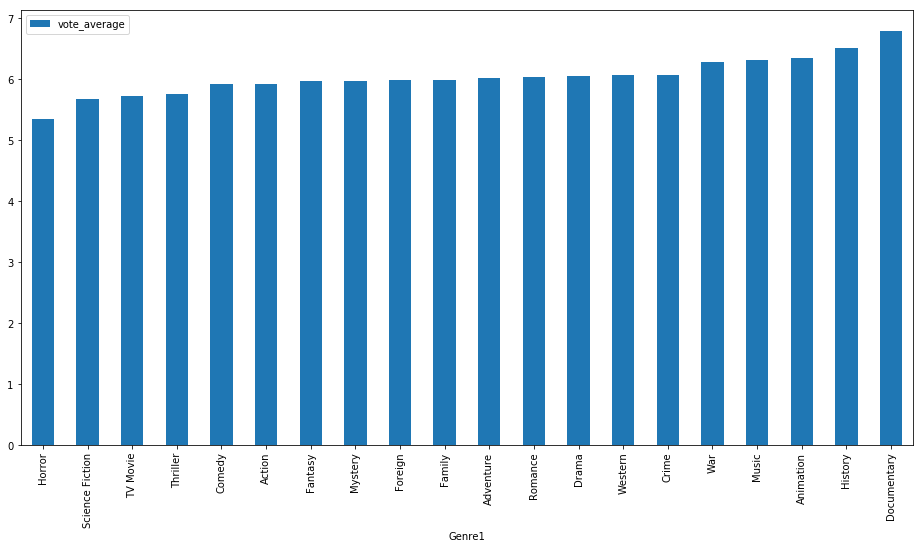

In [60]:
# Plotted the table Z into a bar graph showing the different vote averages per genre
z.plot(kind='bar',figsize=(16,8),legend=True);

In [61]:
# Find the popularity mean between all the genre columns
f=df_combined.groupby('Genre1')['popularity'].mean()
g=df_combined.groupby('Genre2')['popularity'].mean()
h=df_combined.groupby('Genre3')['popularity'].mean()
i=df_combined.groupby('Genre4')['popularity'].mean()
j=df_combined.groupby('Genre5')['popularity'].mean()

In [62]:
# Doing the same thing on the documentary popularity means and adding them back into the popz table with the other
# genre popularity averages
Dmean=(f['Documentary']+g['Documentary']+h['Documentary']+i['Documentary'])/4
G2mean=(f.drop(['Documentary'])+g.drop(['Documentary'])+h.drop(['Documentary'])+i.drop(['Documentary'])+j)/5
popx=pd.DataFrame({'popularity': [Dmean]},index=['Documentary']).reset_index()
popx=popx.rename(index=str, columns={"index": "Genre1"})
popy=G2mean.reset_index()
popz=popy.append(popx)
popz=popz.set_index('Genre1')
popz

,popularity
Genre1,
Action,1.099287
Adventure,1.331098
Animation,0.981564
Comedy,0.965454
Crime,0.729069
Drama,0.651938
Family,0.799271
Fantasy,0.986294
Foreign,0.187119


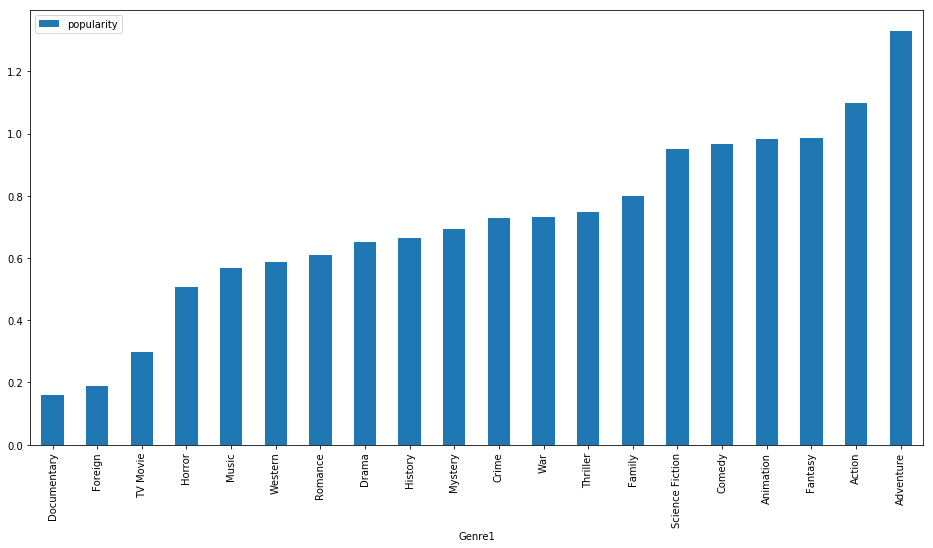

In [63]:
# Graph the different genres with their respective popularity averages
popz.sort_values(by='popularity',inplace=True)
popz.plot(kind='bar',figsize=(16,8),legend=True);

The genres that are the most highly rated is the documentary genre , however it is also the least popular with a smaller number of votes. The adventure and action genres are some of the most popular genres. A genre that is consistent with popularity as well as ratings is the animation genre, which is also one of my favorite genres! 

<a id='conclusions'></a>
## Conclusions
According to this dataset , we have found out some pretty cool things about movies! The runtime stratification into different groups according to the distributions showed that longer movies were more popular, made more money, and rated higher. However, when I separated the data into a short film group and a feature film group defined by the Academy, short films in this dataset were rated higher than feature films! The feature films were more profitable and more popular however. I did not do any tests that relate these two variables so we can't say they are profitable because they are popular. 
Studios seem to be taking advantage of release months. According to the data, there are more popular movies that come out during the summer (June) and the holiday season (November and December). The movie profits seem to reflect this trend as well. In addition, the higher rated movies seem to be released towards the end of the year. 
Finally, the documentary genre have received the highest voted rating out of all the other genres. However, there are less movies of this genre in this dataset, so there could be some number bias. The adventure and action movies are really popular. The animation genre is pretty high in rating as well as popularity. 

### Limitations

There are some statistical limitations for this dataset and analysis. The genres were not represented equally with many more rated movies in the action and adventure genres than the documentary and history genres, which would misrepresent the true  ratings and popularity of these genres as a whole. There are missing values in many of the adjusted revenue and budget columns which caused blank profit columns. Those movies had to be removed but if these missing values were actually reported, maybe the data and statistics would have changed. 